# Application of Genetic Algorithm and Neural Networks in Stock Trading

In [1]:
import numpy as np
from network import flatten_NN, reconstruct_NN
from typing import List, Tuple
from mate import mate
import pandas as pd
import matplotlib.pyplot as plt
from helper_module import split_train_set, split_train_test_sets
from numpy.typing import NDArray
from fitness import fitness, regime, compute_population_fitness, evaluate_nn
from initialize_nn import initialize_nn, init_nn
from initialize_population import initialize_population, init_population
from selection import keep_elites, selection
import random
from mate import mate, reproduce_population, reduce_population
from checkpoint import checkpoint, load_checkpoint
from evolution import run_evolution
import os
from collections import namedtuple
from activation_function import ActivationFunction


                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


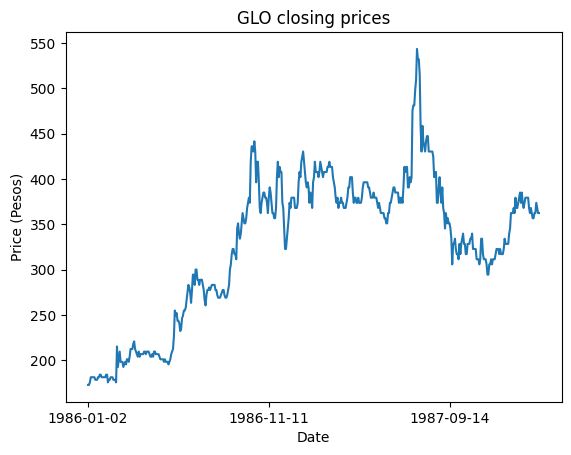

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].head(500))
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

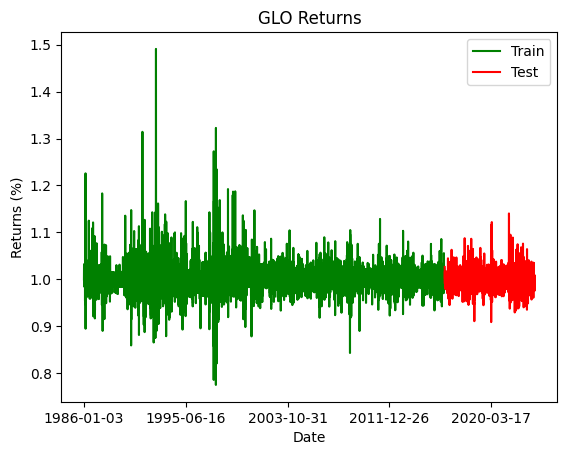

In [3]:
# use only the closing prices of the stock
series = series['Close']
series = series.pct_change(1) + 1
series = pd.Series(data = series, name = 'Close_pct_change')

# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.plot(train, 'g', label = 'Train')
ax.plot(test, 'r', label = 'Test')
ax.set_xticks(ax.get_xticks()[::2000])
ax.legend()
plt.show()

In [4]:
# # split the train set into multiple batches
# train_set = split_train_set(train)

# # plot a sample of the train set
# fig, ax = plt.subplots()    
# ax.set_title('GLO closing prices percent change')
# ax.set_xlabel('Date')
# ax.set_ylabel('Percent change')
# ax.plot(train_set[0], 'g')
# ax.set_xticks(ax.get_xticks()[::100])
# plt.show()

In [5]:
nn_layer_topology = namedtuple('nn_layer_topology', ['input_dim', 'output_dim', 'activation_function', 'enable_layernorm'])

nn_layer1 = nn_layer_topology(input_dim = 250, 
                              output_dim =125, 
                              activation_function = ActivationFunction.tanh, 
                              enable_layernorm = True)
nn_layer2 = nn_layer_topology(input_dim = 125, 
                              output_dim = 70, 
                              activation_function = ActivationFunction.tanh, 
                              enable_layernorm = True)
nn_layer3 = nn_layer_topology(input_dim = 70, 
                              output_dim = 35, 
                              activation_function = ActivationFunction.tanh, 
                              enable_layernorm = True)
nn_layer4 = nn_layer_topology(input_dim = 35, 
                              output_dim = 15, 
                              activation_function = ActivationFunction.tanh, 
                              enable_layernorm = True)
nn_layer5 = nn_layer_topology(input_dim = 15, 
                              output_dim = 8, 
                              activation_function = ActivationFunction.tanh, 
                              enable_layernorm = True)
nn_layer6 = nn_layer_topology(input_dim = 8, 
                              output_dim = 3, 
                              activation_function = ActivationFunction.soft_max, 
                              enable_layernorm = False)

nn_topology = [nn_layer1, nn_layer2, nn_layer3, nn_layer4, nn_layer5, nn_layer6]

In [6]:
population = init_population(nn_topology = nn_topology, num_individuals=100)
WINDOW = 250
MAX_POPULATION = 100
MUTATION_RATE = 0.1
NUM_GENERATIONS = 50
CHECKPOINT_FILEPATH = './checkpoint'
CHECKPOINT_INTERVAL = 10
ENABLE_HYPERMUTATION = True
DROPOUT_RATE = 0.1

# start from generation 0
# population = run_evolution(population = population,
#                            window = WINDOW, 
#                            num_generations = NUM_GENERATIONS, 
#                            train_set = train,
#                            checkpoint_filepath = CHECKPOINT_FILEPATH,
#                            checkpoint_interval = CHECKPOINT_INTERVAL,
#                            mutation_rate = MUTATION_RATE,
#                            enable_hypermutation = ENABLE_HYPERMUTATION,
#                            dropout_rate = DROPOUT_RATE)

In [7]:
# uncomment this cell if starting from a checkpoint
# population = load_checkpoint(checkpoint_filepath = './checkpoint/40.pkl')
# population = run_evolution(population = population,
#                            window = WINDOW, 
#                            starting_generation = 41, 
#                            num_generations = NUM_GENERATIONS, 
#                            train_set = train, 
#                            checkpoint_filepath = CHECKPOINT_FILEPATH,
#                            checkpoint_interval = CHECKPOINT_INTERVAL,
#                            mutation_rate = MUTATION_RATE,
#                            enable_hypermutation = ENABLE_HYPERMUTATION,
#                            dropout_rate = DROPOUT_RATE)

In [18]:
population = load_checkpoint(checkpoint_filepath = './checkpoint/Special-Check-2nd-Element-v1.pkl')

In [19]:
for i in range(10):
    test_sample = np.zeros([1,150])
    for i in range(150):
        test_sample[0][i] = np.random.uniform(0,1)

    probabilities = population[0].propagate_forward(test_sample)
    index = np.argmax(probabilities)
    print(probabilities, index)

[[9.99997023e-01 1.94036920e-07 2.78335138e-06]] 0
[[2.37689029e-08 2.22518516e-10 9.99999976e-01]] 2
[[6.51137285e-06 9.99993489e-01 8.20259114e-13]] 1
[[9.99999991e-01 1.58726691e-09 7.33703586e-09]] 0
[[1.06451557e-08 9.99828944e-01 1.71045614e-04]] 1
[[4.66749291e-20 1.00000000e+00 1.35973680e-25]] 1
[[5.48182955e-11 1.04293251e-07 9.99999896e-01]] 2
[[9.99999767e-01 1.61725004e-09 2.31659705e-07]] 0
[[1.00000000e+00 9.76552448e-19 6.44840700e-24]] 0
[[3.71249612e-08 1.28856272e-18 9.99999963e-01]] 2


In [20]:
# check the fitness of all individuals in the population
for individual in population:
    print(individual.fitness)

13.742036428351
10.452995576768865
10.452995576768865
8.835719355068257
8.835719355068257
8.835719355068257
8.835719355068257
8.835719355068257
8.835719355068257
8.835719355068257


In [23]:
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = train_set[2500], regime = regime, window = 300)
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = train, regime = regime, window = 250)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[1], train_set = test, regime = regime, window = 150)

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_series)

            Close_pct_change  Regime   Returns  Cumulative_Returns
Date                                                              
2016-06-21          1.026316     NaN  1.000000            0.000000
2016-06-22          1.018803     NaN  1.000000            0.000000
2016-06-23          0.999161     NaN  1.000000            0.000000
2016-06-24          0.990764     NaN  1.000000            0.000000
2016-06-27          1.016949     NaN  1.000000            0.000000
2016-06-28          1.001667     NaN  1.000000            0.000000
2016-06-29          1.006656     NaN  1.000000            0.000000
2016-06-30          0.980165     NaN  1.000000            0.000000
2016-07-01          0.994941     NaN  1.000000            0.000000
2016-07-04          0.999153     NaN  1.000000            0.000000
2016-07-05          0.999152     NaN  1.000000            0.000000
2016-07-07          0.997453     NaN  1.000000            0.000000
2016-07-08          1.002553     NaN  1.000000            0.00

In [25]:
print(test_bnh_returns)
print(test_fitness)
print(test_strat_returns)
print(test_num_trades)
print(test_max_drawdown)

-23.157894736842223
6155.614917369621
75.72208685786794
70
0.44578087002008443


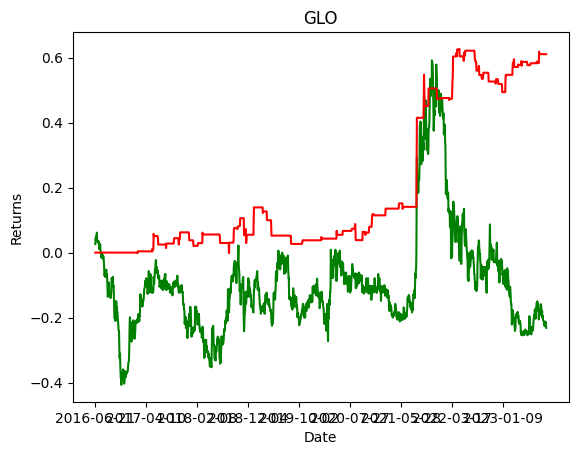

In [26]:
test_series['bnh'] = test_series['Close_pct_change'].cumprod() - 1

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.plot(test_series.index, test_series['bnh'], color = 'g')
ax.plot(test_series.index, test_series['Cumulative_Returns'], color = 'r')
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

In [ ]:
# checkpoint(population = population, generation_number = 99999, checkpoint_filepath = './checkpoint')